<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/naive_horoscopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

In [ ]:
# mount drive, go to link and paste authorization code so that we can read data from shared drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# exploratory analysis
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

sns.set_style('darkgrid')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/CSCI 5223 NLP/horoscope_saved.csv')
df.head()

,sign,category,date,horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'l..."
1,aries,general,20200618,People will understand and appreciate your des...
2,aries,general,20200619,You are very interested in technological break...
3,aries,general,20200620,Stress from overwork could have you feeling we...
4,aries,general,20200621,This is a good day to stand up for yourself an...


## Data Cleaning

In [ ]:
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
categories = ['general', 'love', 'career', 'wellness', 'birthday']
elements = ['fire', 'earth', 'air', 'water']
fire = ['aries', 'leo', 'sagittarius']
earth = ['taurus', 'virgo', 'capricorn']
air = ['gemini', 'libra', 'aquarius']
water = ['cancer', 'scorpio', 'pisces']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

all_general = df[df['category'] == 'general']['horoscope']
all_love = df[df['category'] == 'love']['horoscope']
all_career = df[df['category'] == 'career']['horoscope']
all_wellness = df[df['category'] == 'wellness']['horoscope']
all_birthday = df[df['category'] == 'birthday']['horoscope'] # wordcloud gives 2 grams for birthday, sometimes for love


words_to_remove = []
words_to_remove.extend(signs)
words_to_remove.extend(months)

In [ ]:
# remove punctuation
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

# tokenize horoscopes
tokenizer = RegexpTokenizer(r'\w+')

"""
# helper for get_lemmas
def get_wordnet_pos(word): # from https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
"""

# Init the Wordnet Lemmatizer # adapted from https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
lemmatizer = WordNetLemmatizer()
def get_lemmas(text): # needs sentence input, not list of words
  # lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in text]) # ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  lemmatized_output = [lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)] # [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
  """
  lem = []
  for w in text:
    lem.append([wi for wi in map(lemmatizer.lemmatize, w)]) # adapted from https://stackoverflow.com/questions/52860350/how-to-find-the-lemmas-and-frequency-count-of-each-word-in-list-of-sentences-in
  """
  return lemmatized_output # lem
  # [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]

# remove stopwords
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

# remove sign indicators
def remove_sign_indicators(text):
  doc = [value for value in text if value not in words_to_remove]
  return doc

In [ ]:
def preprocess(df):
  df = df.apply(lambda x: remove_punctuation(x))
  # df = df.apply(lambda x: tokenizer.tokenize(x.lower()))
  df = df.apply(lambda x: x.lower())
  
  # df = df.apply(lambda x: lemmatizer.lemmatize(x)) # needs text, not list
  # Make tokens a string again
  # df = [' '.join(map(str, l)) for l in df] # adapted from https://towardsdatascience.com/twitter-topic-modeling-e0e3315b12e2
  df = df.apply(lambda x: get_lemmas(x)) # ''.join(x)) # takes much longer # don't tokenize before lemmatize?
  
  df = df.apply(lambda x: remove_stopwords(x)) # takes longer

  df = df.apply(lambda x: remove_sign_indicators(x))
  return df

In [ ]:
df['processed_tokens'] = preprocess(df['horoscope']) # takes ~3min on all_horoscopes

In [ ]:
# make tokens a string again
df['processed_horoscope'] = [' '.join(map(str, l)) for l in df['processed_tokens']]

In [ ]:
df.columns

Index(['sign', 'category', 'date', 'horoscope', 'processed_tokens',
       'processed_horoscope'],
      dtype='object')

In [ ]:
df.head()

,sign,category,date,horoscope,processed_tokens,processed_horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'l...","[great, day, ahead, youll, blessed, ability, s...",great day ahead youll blessed ability solve pr...
1,aries,general,20200618,People will understand and appreciate your des...,"[people, understand, appreciate, desire, stand...",people understand appreciate desire stand crow...
2,aries,general,20200619,You are very interested in technological break...,"[interested, technological, breakthrough, inno...",interested technological breakthrough innovati...
3,aries,general,20200620,Stress from overwork could have you feeling we...,"[stress, overwork, could, feeling, weaker, usu...",stress overwork could feeling weaker usual mig...
4,aries,general,20200621,This is a good day to stand up for yourself an...,"[good, day, stand, make, known, arent, pushove...",good day stand make known arent pushover use p...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sign                 21959 non-null  object
 1   category             21959 non-null  object
 2   date                 21959 non-null  int64 
 3   horoscope            21959 non-null  object
 4   processed_tokens     21959 non-null  object
 5   processed_horoscope  21959 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [ ]:
df['horoscope_length'] = df['horoscope'].apply(len)
df['p_horoscope_length'] = df['processed_horoscope'].apply(len)
df['num_words_removed'] = df['horoscope_length'] - df['p_horoscope_length']

In [ ]:
df.head()

,sign,category,date,horoscope,processed_tokens,processed_horoscope,horoscope_length,p_horoscope_length,num_words_removed
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'l...","[great, day, ahead, youll, blessed, ability, s...",great day ahead youll blessed ability solve pr...,345,206,139
1,aries,general,20200618,People will understand and appreciate your des...,"[people, understand, appreciate, desire, stand...",people understand appreciate desire stand crow...,409,244,165
2,aries,general,20200619,You are very interested in technological break...,"[interested, technological, breakthrough, inno...",interested technological breakthrough innovati...,337,211,126
3,aries,general,20200620,Stress from overwork could have you feeling we...,"[stress, overwork, could, feeling, weaker, usu...",stress overwork could feeling weaker usual mig...,393,219,174
4,aries,general,20200621,This is a good day to stand up for yourself an...,"[good, day, stand, make, known, arent, pushove...",good day stand make known arent pushover use p...,348,196,152


Text(0.5, 1.0, 'Number of Words Removed')

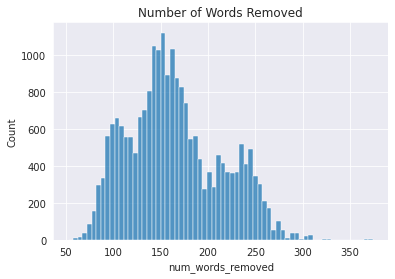

In [ ]:
sns.histplot(x='num_words_removed', data=df).set_title("Number of Words Removed")

Categorical --> Numeric

In [ ]:
df['sign'] = df['sign'].astype('category')
df['category'] = df['category'].astype('category')


In [ ]:
# signs = dict(enumerate(df['sign'].cat.categories))
# originally encoded them automatically, but there is a sort of 'order' so manually encode
signs = {
'capricorn': 0,
'aquarius': 1,
'pisces': 2,
'aries': 3,
'taurus': 4,
'gemini': 5,
'cancer': 6,
'leo': 7,
'virgo': 8,
'libra': 9,
'scorpio': 10,
'sagittarius': 11,
}

# encode automatically since not ordinal
categories = dict(enumerate(df['category'].cat.categories))

# print categories nicely
print(categories)

{0: 'birthday', 1: 'career', 2: 'general', 3: 'love', 4: 'wellness'}


In [ ]:
df['sign'] = df['sign'].replace(signs)
df['category'] = df['category'].cat.codes

In [ ]:
df.head()

,sign,category,date,horoscope,processed_tokens,processed_horoscope,horoscope_length,p_horoscope_length,num_words_removed
0,3,2,20200617,"There's a great day ahead of you, Aries. You'l...","[great, day, ahead, youll, blessed, ability, s...",great day ahead youll blessed ability solve pr...,345,206,139
1,3,2,20200618,People will understand and appreciate your des...,"[people, understand, appreciate, desire, stand...",people understand appreciate desire stand crow...,409,244,165
2,3,2,20200619,You are very interested in technological break...,"[interested, technological, breakthrough, inno...",interested technological breakthrough innovati...,337,211,126
3,3,2,20200620,Stress from overwork could have you feeling we...,"[stress, overwork, could, feeling, weaker, usu...",stress overwork could feeling weaker usual mig...,393,219,174
4,3,2,20200621,This is a good day to stand up for yourself an...,"[good, day, stand, make, known, arent, pushove...",good day stand make known arent pushover use p...,348,196,152


## Naive bayes approach

This approach was for a binary text classification problem. Our problem is not binary, so this method may not be appropriate.

In [ ]:
# implementing bag of words
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
horoscopes = list(df['processed_horoscope'])

In [ ]:
count_vector.fit(horoscopes)
# count_vector.get_feature_names()

CountVectorizer()

In [ ]:
doc_array = count_vector.transform(horoscopes).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['processed_horoscope'], 
                                                    df['sign'],test_size=0.20, 
                                                    random_state=1)

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [ ]:
print (training_data.shape)

(17567, 11824)


In [ ]:
print (testing_data.shape)

(4392, 11824)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [ ]:
#Make prediction on test dataset
predictions = naive_bayes.predict(testing_data.toarray())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, average='micro')))
print('Recall score: {}'.format(recall_score(y_test, predictions, average='micro')))
print('F1 score: {}'.format(f1_score(y_test, predictions, average='micro')))

Accuracy score: 0.05145719489981785
Precision score: 0.05145719489981785
Recall score: 0.05145719489981785
F1 score: 0.05145719489981785


## Multi-Class Text Classification

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

Term Frequency, Inverse Document Frequency



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df: min number of documents a word must be present in to be kept
# don't need stop words since data is already processed
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=100, norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df['processed_horoscope']).toarray()
labels = df['sign']
features.shape

(21959, 1386)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


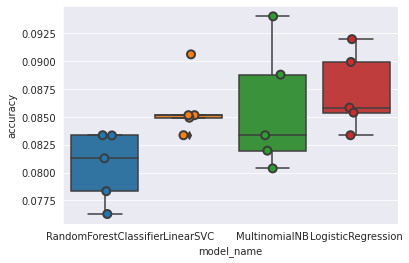

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.085842
LogisticRegression        0.087299
MultinomialNB             0.085705
RandomForestClassifier    0.080514
Name: accuracy, dtype: float64